In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read both train and test files
train = pd.read_csv('Titanic_train.csv')
test = pd.read_csv('Titanic_test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## EDA

<Axes: xlabel='Survived', ylabel='count'>

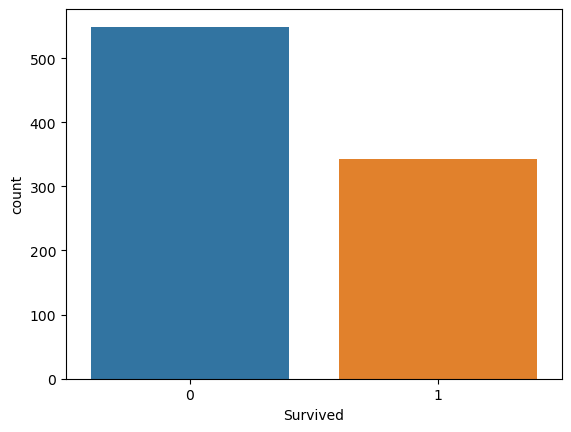

In [5]:
# Analysis using EDA

sns.countplot(x= train['Survived']) #Survival rate

<Axes: xlabel='Sex', ylabel='count'>

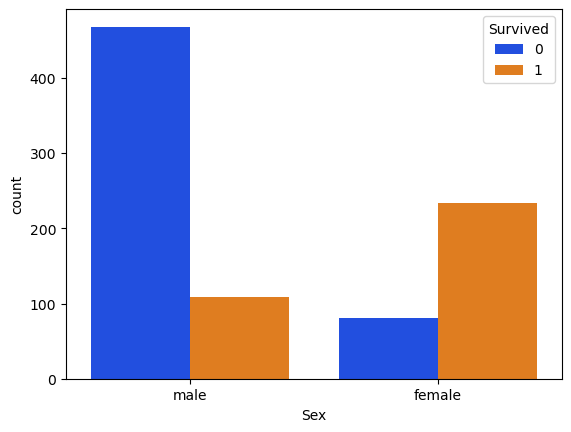

In [6]:
#comparing male to female ratio of those that survived 
sns.countplot(x='Sex', hue= 'Survived', data=train, palette = 'bright') 

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

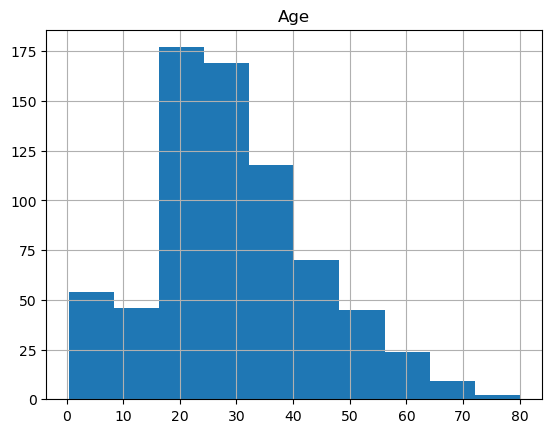

In [7]:
train.hist('Age')

<Axes: ylabel='Frequency'>

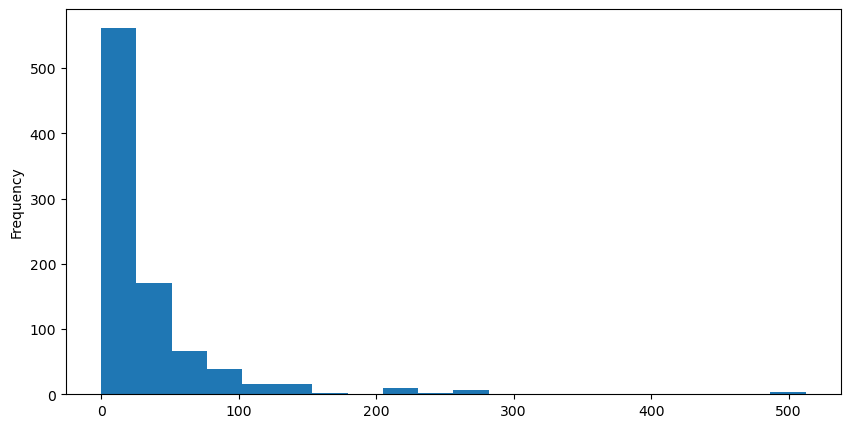

In [8]:
train['Fare'].plot.hist(bins=20, figsize=(10,5))

<Axes: xlabel='count', ylabel='SibSp'>

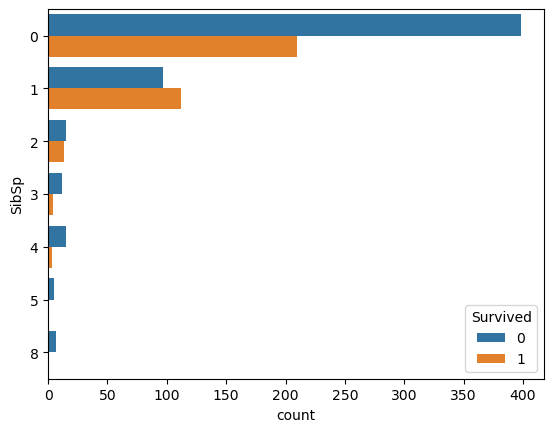

In [9]:
sns.countplot(y='SibSp', hue = "Survived", data=train)

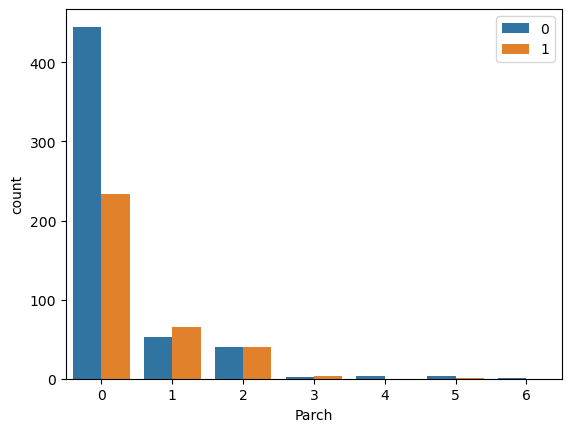

In [10]:
sns.countplot(x='Parch', hue = "Survived", data=train)
plt.legend(loc = 'upper right')

<Axes: xlabel='Pclass', ylabel='Age'>

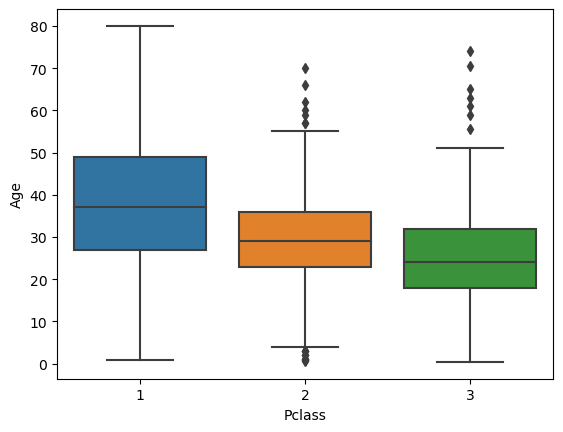

In [11]:
sns.boxplot(x='Pclass', y='Age', data=train)

In [12]:
# Performing data wrangling over train and test data

target = train['Survived']
train = train.drop('Survived', axis=1) #dropping survived column 


In [13]:
data = train.append(test) #concatenating both train and test data for pre processing
data.head()

C:\Users\pc\AppData\Local\Temp\ipykernel_32936\3418952780.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = train.append(test) #concatenating both train and test data for pre processing


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
target = pd.DataFrame(target)
target.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [15]:
data.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [16]:
#dropping columns with high number of missing values
data.drop(['Age', 'Cabin'], axis = 1, inplace = True)

In [17]:
data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       2
dtype: int64

In [18]:
#filling missing fare value with mean value
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())

In [19]:
#using forward-fill to fill the missing value in the Embarked column
data['Embarked'] = data['Embarked'].fillna(method = 'ffill')

In [20]:
data.isnull().sum()  #all the missing values have been catered for through data munging

PassengerId    0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [21]:
#preprocessing and dropping of some columns with low correlation
data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace = True) 

In [22]:
data['Embarked'].unique() 

array(['S', 'C', 'Q'], dtype=object)

In [23]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [24]:
#transforming columns with one_hot_encoding
embarked_dummies = pd.get_dummies(data.Embarked)
data = pd.concat([data,embarked_dummies], axis=1)
data = data.drop("Embarked", axis=1)

sex_dummies= pd.get_dummies(data.Sex)
data = pd.concat([data,sex_dummies], axis=1)
data = data.drop("Sex", axis=1)

In [25]:
(data.shape) #train and train data shape

(1309, 9)

In [26]:
new_train_data = data.iloc[:891,]
new_train_data

,Pclass,SibSp,Parch,Fare,C,Q,S,female,male
0,3,1,0,7.2500,0,0,1,0,1
1,1,1,0,71.2833,1,0,0,1,0
2,3,0,0,7.9250,0,0,1,1,0
3,1,1,0,53.1000,0,0,1,1,0
4,3,0,0,8.0500,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
886,2,0,0,13.0000,0,0,1,0,1
887,1,0,0,30.0000,0,0,1,1,0
888,3,1,2,23.4500,0,0,1,1,0
889,1,0,0,30.0000,1,0,0,0,1


In [27]:
new_test_data = data.iloc[891:,]
new_test_data

,Pclass,SibSp,Parch,Fare,C,Q,S,female,male
0,3,0,0,7.8292,0,1,0,0,1
1,3,1,0,7.0000,0,0,1,1,0
2,2,0,0,9.6875,0,1,0,0,1
3,3,0,0,8.6625,0,0,1,0,1
4,3,1,1,12.2875,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
413,3,0,0,8.0500,0,0,1,0,1
414,1,0,0,108.9000,1,0,0,1,0
415,3,0,0,7.2500,0,0,1,0,1
416,3,0,0,8.0500,0,0,1,0,1


In [28]:
# Split into training and testing from new train data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(new_train_data, target, random_state=11,test_size = 0.3)

#pip install xgboost

In [31]:
# Perform xgboost method
import xgboost as xgb

# Setting hyperparameters
dtrain = xgb.DMatrix(x_train, label=y_train)

# Set hyperparameters
params = {
    'max_depth': 6,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'error'
}

In [32]:
# Training model with cross validation

cv_results = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    nfold=5,
    metrics=['error'],
    early_stopping_rounds=10,
    stratified=True,
    seed=42
)

best_iteration = cv_results['test-error-mean'].idxmin()
best_error = cv_results.loc[best_iteration, 'test-error-mean']

print(f"Best error rate: {best_error:.4f} (iteration: {best_iteration+1})")

Best error rate: 0.1959 (iteration: 44)


In [33]:
# Making predictions on test data and evaluate results
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix


dtest = xgb.DMatrix(x_test)

best_model = xgb.train(params, dtrain, num_boost_round=best_iteration+1)

predictions = best_model.predict(dtest)
predictions = [round(value) for value in predictions]

accuracy = accuracy_score(y_test, predictions)
print("Test accuracy:", accuracy)

Test accuracy: 0.8171641791044776


In [41]:
# Performing lightgb method

import lightgbm as lgb

clf = lgb.LGBMClassifier()
clf.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 250, number of negative: 373
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000266 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 139
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.401284 -> initscore=-0.400118
[LightGBM] [Info] Start training from score -0.400118
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


C:\Users\pc\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


LGBMClassifier()

In [42]:
# predict the results
y_pred=clf.predict(x_test)

In [43]:
# view accuracy

accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.8172


In [44]:
cm = confusion_matrix(y_test, y_pred)

<Axes: >

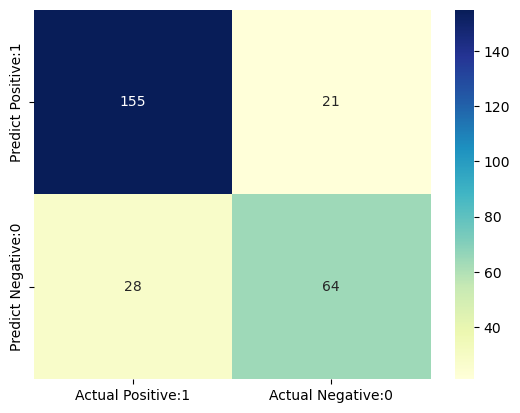

In [45]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
# Thank You..